In [1]:
import pandas as pd
import numpy as np
import polars as pl
from scipy.stats import false_discovery_control
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import seaborn as sns
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen,VerticalPitch

In [2]:
free_comps = sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [ ]:
events = sb.events (match_id = 18236)
df = events[events.type == 'Shot']
df[['start_location_x','start_location_y']] = pd.DataFrame(df.location.tolist(), index= df.index)
df = df[['period', 'minute', 'team', 'player','start_location_x','start_location_y', 'shot_outcome', 'shot_statsbomb_xg' ]]
df.rename(columns = {'shot_statsbomb_xg':'xG', 'shot_outcome':'result'}, inplace = True)
df.sort_values(by='team', inplace=True)

In [ ]:
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]
print('Home Team : ' + hteam)
print('Away Team : ' + ateam)

In [ ]:
hteam_df = df[df['team'] == hteam]
hteam_df_g = hteam_df[hteam_df["result"] == "Goal"]
hteam_df_ng = hteam_df[hteam_df["result"] != "Goal"]

ateam_df = df[df['team'] == ateam]
ateam_df_g = ateam_df[ateam_df["result"] == "Goal"]
ateam_df_ng = ateam_df[ateam_df["result"] != "Goal"]

In [ ]:
pitch = VerticalPitch(half=False, goal_type='box',linewidth=1,line_color='white',pad_bottom= 0.31)
fig, ax = pitch.draw(figsize=(9, 8))
hteam_sc_g = pitch.scatter(hteam_df_g["start_location_x"], hteam_df_g["start_location_y"], s = hteam_df_g["xG"]*300+100,
                         marker="o",c= 'red', ax=ax, alpha=0.7, edgecolors='red',linewidth = 1, label = " Goals")

hteam_sc_ng = pitch.scatter(hteam_df_ng["start_location_x"], hteam_df_ng["start_location_y"],s = hteam_df_ng["xG"]*300+100,
                         marker="o", c= 'none', ax=ax, edgecolors='#004d98',linewidth = 1, label = " Shots")


fig.text(s=hteam + " Shots Map", x= 0.06, y= 0.96, fontsize=22,fontweight="bold")
fig.text(s='Final Champions League 2010/2011', x = 0.06, y=0.92, fontsize=15)
ax.legend(title = 'Outcome', labelspacing=1, loc="upper center",ncol=6,frameon=True,fancybox=True, shadow=True,bbox_to_anchor=(0.5, -0.01))

In [ ]:
pitch = VerticalPitch(half=True, goal_type='box',linewidth=1,line_color='white',pad_bottom= 0.21)
fig, ax = pitch.draw(figsize=(9, 8))

ateam_sc_g = pitch.scatter(ateam_df_g["start_location_x"], ateam_df_g["start_location_y"], s = ateam_df_g["xG"]*300+100,
                         marker="o",c= 'red', ax=ax, alpha=0.7, edgecolors='red',linewidth = 1, label = " Goals")

ateam_sc_ng = pitch.scatter(ateam_df_ng["start_location_x"], ateam_df_ng["start_location_y"],s = ateam_df_ng["xG"]*300+100,
                         marker="o", c= 'none', ax=ax, edgecolors='#004d98',linewidth = 1, label = " Shots")


fig.text(s=ateam + " Shots Map", x= 0.06, y= 0.96, fontsize=22,fontweight="bold")
fig.text(s='Final Champions League 2010/2011', x = 0.06, y=0.92, fontsize=15)
ax.legend(title = 'Outcome', labelspacing=1, loc="upper center",ncol=6,frameon=True,fancybox=True, shadow=True,bbox_to_anchor=(0.5, -0.01))

In [ ]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from mplsoccer import VerticalPitch, Sbopen
comp = sb.competitions()
comp.to_csv('competitions.csv', index=False)

df = sb.matches(competition_id=43, season_id=106)
df.to_csv('WC_Matches.csv', index=False)

match = 3869118
match_events = sb.events(match_id=match)
team_list =list(match_events.team.unique())

first_half = match_events.loc[match_events['period'] == 1]
second_half = match_events.loc[match_events['period'] == 2]

pass_raw = first_half[match_events.type== 'Pass']

pass_number_raw = pass_raw[['timestamp', 'player', 'pass_recipient']]
pass_number_raw['pair'] = pass_number_raw.player + pass_number_raw.pass_recipient

pass_count = pass_number_raw.groupby(['pair']).count().reset_index()
pass_count = pass_count[['pair', 'timestamp']]
pass_count.columns = ['pair', 'number_pass']
pass_count.head()

def create_passmap_df(national_team:str,match_events:pd.DataFrame):

    first_half = match_events.loc[match_events['period'] == 1]
    second_half = match_events.loc[match_events['period'] == 2]
    pass_raw = first_half[match_events.type== 'Pass']
    pass_number_raw = pass_raw[['timestamp', 'player', 'pass_recipient']]
    pass_number_raw['pair'] = pass_number_raw.player + pass_number_raw.pass_recipient
    pass_count = pass_number_raw.groupby(['pair']).count().reset_index()
    pass_count = pass_count[['pair', 'timestamp']]
    pass_count.columns = ['pair', 'number_pass']

    avg_loc_df = pass_raw[['team', 'player', 'location']]
    avg_loc_df['pos_x'] = avg_loc_df.location.apply(lambda x: x[0])
    avg_loc_df['pos_y'] = avg_loc_df.location.apply(lambda x: x[1])
    avg_loc_df = avg_loc_df.drop('location', axis=1)

    avg_loc_df = avg_loc_df.groupby(['team','player']).agg({'pos_x': np.mean, 'pos_y': np.mean}).reset_index()

    pass_merge = pass_number_raw.merge(pass_count, on='pair')
    pass_merge = pass_merge[['player', 'pass_recipient', 'number_pass']]
    pass_merge = pass_merge.drop_duplicates()

    avg_loc_df = avg_loc_df[['player', 'pos_x', 'pos_y']]

    pass_cleaned = pass_merge.merge(avg_loc_df, on='player')
    pass_cleaned.rename({'pos_x': 'pos_x_start', 'pos_y': 'pos_y_start'}, axis='columns', inplace=True)

    pass_cleaned = pass_cleaned.merge(avg_loc_df, left_on='pass_recipient', right_on='player', suffixes=['', '_end'])
    pass_cleaned.rename({'pos_x': 'pos_x_end', 'pos_y': 'pos_y_end'}, axis='columns', inplace=True)

    # pass_cleaned = pass_cleaned.drop(['player_name_end'], axis=1)

    player_df = first_half[first_half.team == national_team ].groupby('player').agg({'minute': [min, max]}).reset_index()
    player_df = pd.concat([player_df['player'], player_df['minute']], axis=1)
    player_df['minutes_played'] = player_df['max'] - player_df['min']
    player_df = player_df.sort_values('minutes_played', ascending=False)

    player_names = player_df.player[:11].tolist()

    pass_team = pass_cleaned[pass_cleaned.player.isin(player_names)]
    pass_team = pass_team[pass_team.pass_recipient.isin(player_names)]

    pass_team['width'] = pass_team['number_pass'] / pass_team['number_pass'].max()

    return pass_team

pass_df = create_passmap_df("England",match_events)


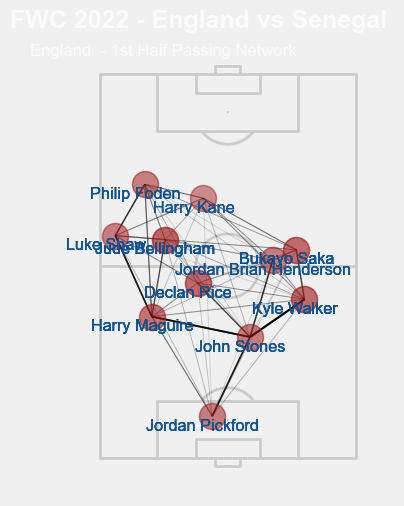

In [14]:
from matplotlib.colors import to_rgba
import matplotlib.style as style
from PIL import Image
import matplotlib.image as image


style.use('fivethirtyeight')

MIN_TRANSPARENCY = 0.1
color = np.array(to_rgba('black'))
color = np.tile(color, (len(pass_df), 1))
c_transparency = pass_df.number_pass / pass_df.number_pass.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = VerticalPitch(pitch_type='statsbomb',
    half = False,
    axis = True,
    goal_type='box')

fig, axs = pitch.grid(figheight=5, title_height=0.08, endnote_space=0, axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)


pass_lines = pitch.lines(pass_df.pos_x_start, pass_df.pos_y_start,
                         pass_df.pos_x_end, pass_df.pos_y_end,
                         lw=pass_df.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(pass_df.pos_x_start, pass_df.pos_y_start, s=350,
                           color= '#a71c1c', linewidth=1, alpha=0.1, ax=axs['pitch'])

for index, row in pass_df.iterrows():
    pitch.annotate(row.player, xy=(row.pos_x_start-3, row.pos_y_start-3), c='#0b5394', va='center',
                   ha='center', size='small', weight = 'light', family='sans-serif', ax=axs['pitch'],stretch= 'ultra-condensed',style="normal" ,alpha=0.5)

axs['title'].text(0.4, 1, f'FWC 2022 - {team_list[0]} vs {team_list[1]} ', weight = 'bold', alpha = .75,
                  va='center', ha='center', fontsize=18)
axs['title'].text(0.25, 0.25, f'{team_list[0]}  - 1st Half Passing Network',
                  va='center', ha='center', alpha = .75, fontsize=12)
plt.show()


In [ ]:
parser = Sbopen()
events, related, freeze, players = parser.event(15946)
TEAM = 'Barcelona'
OPPONENT = 'versus Alavés (A), 2018/19 La Liga'

events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

In [ ]:
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)

In [ ]:
sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

In [ ]:
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [ ]:
events.groupby('team_name').tactics_formation.unique()

In [ ]:
FORMATION = '433'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

In [ ]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [ ]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)

In [ ]:
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=axs['pitch'])
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=axs['pitch'])

# Load a custom font.
URL = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf'
robotto_regular = FontManager(URL)

# endnote /title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
TITLE_TEXT = f'{TEAM}, {FORMATION} formation'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, OPPONENT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'

plt.show()  # If you are using a Jupyter notebook you do not need this line